In [139]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

In [90]:
card_re = pd.read_csv("CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt", sep ="\t")
card_fo = pd.read_csv("CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt", sep ="\t", encoding='CP949')

In [91]:
def year_month(data):
    data = str(data)
    return int(data[0:6])

In [92]:
card_re['STD_YM'] = card_re['STD_DD'].apply(lambda x: year_month(x))
card_fo['STD_YM'] = card_fo['STD_DD'].apply(lambda x: year_month(x))

In [93]:
# 년월별 업종별 이용건수
card_re_mct = card_re.pivot_table("USE_CNT","STD_YM","MCT_CAT_CD")
card_re_mct = card_re_mct.reset_index()

In [94]:
card_fo_mct = card_fo.pivot_table("USE_CNT","STD_YM","MCT_CAT_CD")
card_fo_mct = card_fo_mct.reset_index()

In [95]:
#card_re_mct = card_re_mct.astype({"STD_YM":'object'})

In [96]:
card_re_mct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 24 columns):
STD_YM    8 non-null int64
10        8 non-null float64
20        8 non-null float64
21        8 non-null float64
22        8 non-null float64
30        8 non-null float64
31        8 non-null float64
32        8 non-null float64
33        8 non-null float64
34        8 non-null float64
35        8 non-null float64
40        8 non-null float64
42        8 non-null float64
43        8 non-null float64
44        8 non-null float64
50        8 non-null float64
52        8 non-null float64
60        8 non-null float64
62        8 non-null float64
70        8 non-null float64
71        8 non-null float64
80        8 non-null float64
81        8 non-null float64
92        8 non-null float64
dtypes: float64(23), int64(1)
memory usage: 1.6 KB


In [97]:
# card_re_mct.set_index("STD_YM")

In [98]:
card_re_mct.head()

MCT_CAT_CD,STD_YM,10,20,21,22,30,31,32,33,34,...,44,50,52,60,62,70,71,80,81,92
0,201902,16.157390,37.534481,32.700139,20.561256,5.714491,5.184466,7.666667,44.523039,8.842723,...,23.398455,20.280588,587.517579,5.818182,29.496854,65.155551,23.705495,336.012879,36.086083,7.687464
1,201903,15.748278,35.556159,31.895090,17.043499,5.837958,5.191406,7.768817,43.094220,8.497441,...,22.621187,29.139233,557.427075,6.493235,29.825088,66.041253,23.204004,357.891159,38.751243,8.319670
2,201904,15.592625,32.301778,30.525546,16.859582,6.036675,5.632850,7.864917,44.030274,8.079389,...,21.541311,23.787315,731.670924,6.665060,29.603972,72.758492,22.151753,371.390998,39.910878,8.355369
3,201905,15.274308,37.569017,30.977653,18.157107,5.448232,5.000000,7.108888,44.469739,7.648548,...,22.266752,22.360324,835.086670,6.162611,26.776624,69.163040,22.136881,373.120202,37.962646,7.942758
4,202002,13.843535,29.507975,33.896075,11.769350,4.991364,4.599251,6.734366,36.099587,7.425295,...,15.545053,15.669017,501.857058,5.281163,18.691626,63.650401,16.765347,301.911977,34.733150,7.004948


- 업종별로 이용건수의 격차가 크다

In [133]:
card_re_temp = card_re_mct.drop("STD_YM", axis=1)

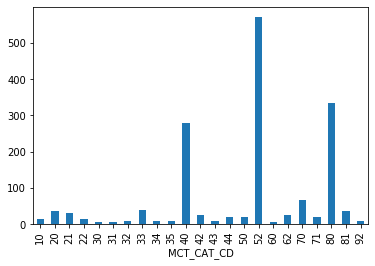

In [134]:
card_re_temp.mean().plot(kind="bar")

- 내국인: 52 > 80 > 40 업종이 이용건수가 압도적
- 52:사무통신, 80:요식업소, 40:유통업

In [99]:
card_fo_mct.head()

MCT_CAT_CD,STD_YM,10,20,21,22,30,31,32,33,34,...,44,50,52,60,62,70,71,80,81,92
0,201902,32.793987,26.000939,2.204678,2.464689,1.125000,1.0,1.309859,1.240602,1.769634,...,9.002606,10.190355,17.925146,1.294118,58.936652,4.145858,36.441498,37.838432,4.644376,1.755556
1,201903,36.351630,31.719647,2.013015,2.609589,1.266667,1.5,1.616667,1.274074,1.660584,...,11.087179,11.620690,19.672285,1.166667,89.400552,4.696244,47.214211,42.288566,5.413988,2.295699
2,201904,38.198286,34.378157,2.217221,3.122927,1.272727,1.0,1.390071,1.267974,1.735786,...,11.236390,11.877289,20.023726,1.714286,79.847594,4.768642,43.090938,44.438645,5.667910,2.891304
3,201905,39.533835,34.683014,2.530488,2.753784,1.344828,1.0,1.375000,1.198758,1.648551,...,11.084332,11.284474,19.797127,1.181818,79.176718,4.901408,40.171457,44.887677,5.648178,2.193069
4,202002,21.073093,20.480483,1.829545,2.623987,1.222222,NaN,1.186667,1.208333,1.389937,...,13.817935,10.465278,19.898364,1.100000,66.140351,5.432773,36.839980,35.234910,4.543445,1.184615


In [135]:
card_fo_temp = card_fo_mct.drop("STD_YM", axis=1)

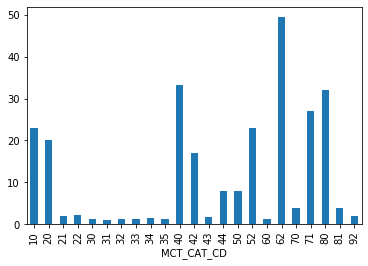

In [137]:
card_fo_temp.mean().plot(kind="bar")

- 외국인은 일단 내국인에 비해 표본이 많이 적음
- 62 > 40,80 > 71 > 52,10,20 > 42
- 62:자동차정비, 40:유통업, 80:요식업소, 71:보건위생
- 자동차정비가 왜 많을까? : 렌트가 자동차정비에 포함되나??

In [ ]:
plt.subplot(2,1,1)
plt.plot(card_re_mct[10])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[10])

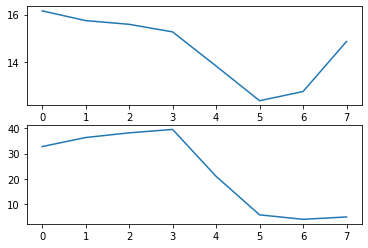

In [100]:
# 숙박
plt.subplot(2,1,1)
plt.plot(card_re_mct[10])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[10])

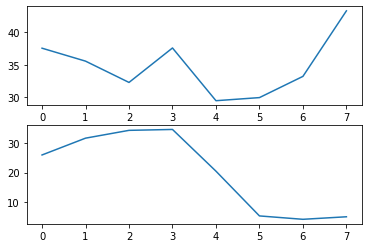

In [101]:
# 레저용품
plt.subplot(2,1,1)
plt.plot(card_re_mct[20])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[20])

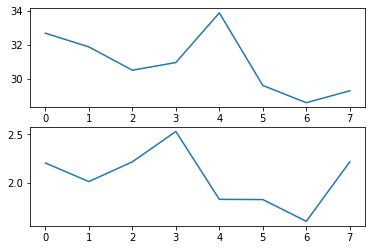

In [102]:
# 레저업소
plt.subplot(2,1,1)
plt.plot(card_re_mct[21])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[21])

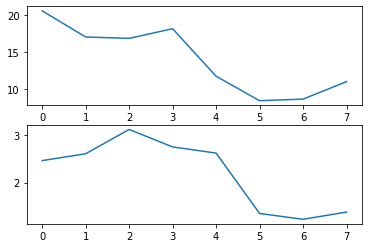

In [103]:
# 문화취미
plt.subplot(2,1,1)
plt.plot(card_re_mct[22])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[22])

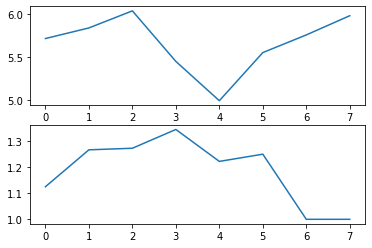

In [104]:
# 가구
plt.subplot(2,1,1)
plt.plot(card_re_mct[30])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[30])

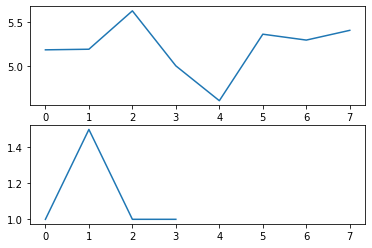

In [105]:
# 전기
plt.subplot(2,1,1)
plt.plot(card_re_mct[31])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[31])

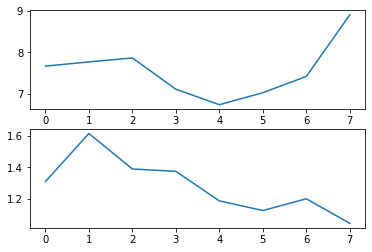

In [106]:
# 주방용구
plt.subplot(2,1,1)
plt.plot(card_re_mct[32])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[32])

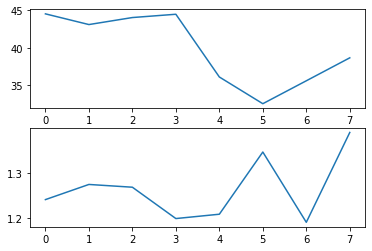

In [107]:
# 연료판매
plt.subplot(2,1,1)
plt.plot(card_re_mct[33])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[33])

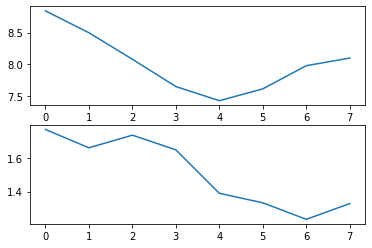

In [108]:
# 광학제품
plt.subplot(2,1,1)
plt.plot(card_re_mct[34])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[34])

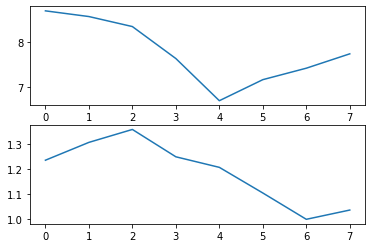

In [109]:
# 가전
plt.subplot(2,1,1)
plt.plot(card_re_mct[35])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[35])

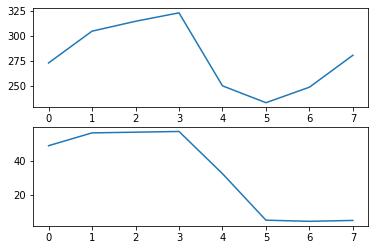

In [110]:
# 유통업
plt.subplot(2,1,1)
plt.plot(card_re_mct[40])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[40])

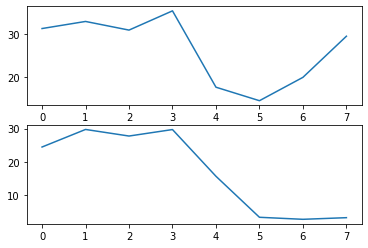

In [111]:
# 의복
plt.subplot(2,1,1)
plt.plot(card_re_mct[42])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[42])

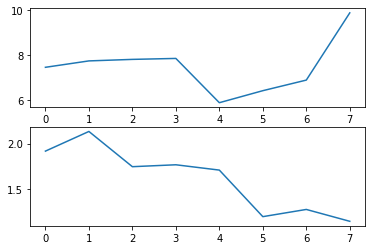

In [112]:
# 직물
plt.subplot(2,1,1)
plt.plot(card_re_mct[43])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[43])

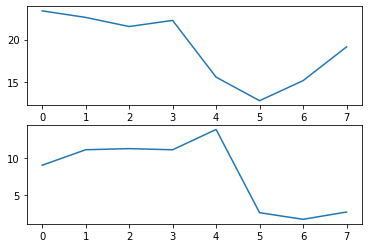

In [113]:
# 신변잡화
plt.subplot(2,1,1)
plt.plot(card_re_mct[44])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[44])

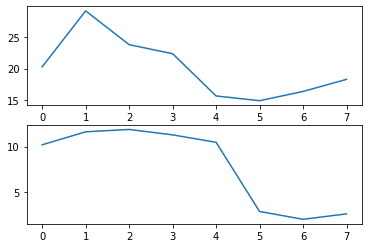

In [114]:
# 서적문구
plt.subplot(2,1,1)
plt.plot(card_re_mct[50])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[50])

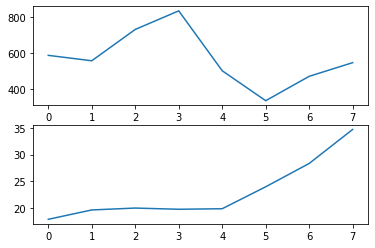

In [115]:
# 사무통신
plt.subplot(2,1,1)
plt.plot(card_re_mct[52])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[52])

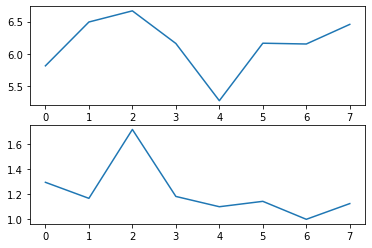

In [116]:
# 자동차판매
plt.subplot(2,1,1)
plt.plot(card_re_mct[60])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[60])

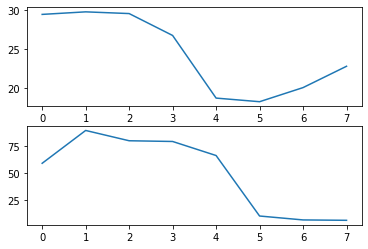

In [117]:
# 자동차정비
plt.subplot(2,1,1)
plt.plot(card_re_mct[62])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[62])

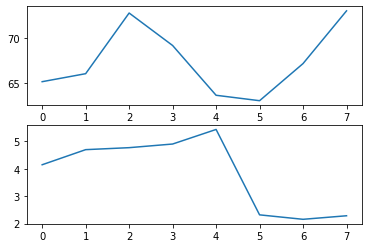

In [118]:
# 의료기관
plt.subplot(2,1,1)
plt.plot(card_re_mct[70])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[70])

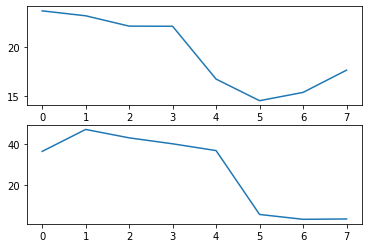

In [120]:
# 보건위생
plt.subplot(2,1,1)
plt.plot(card_re_mct[71])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[71])

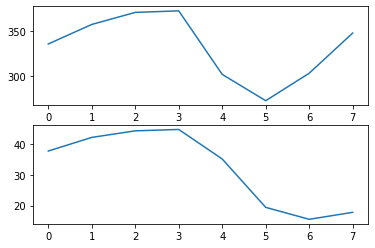

In [121]:
# 요식업소
plt.subplot(2,1,1)
plt.plot(card_re_mct[80])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[80])

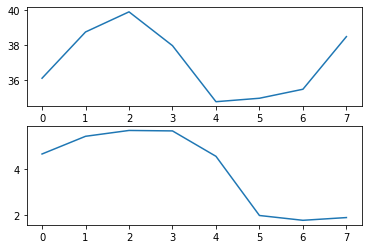

In [122]:
# 음료식품
plt.subplot(2,1,1)
plt.plot(card_re_mct[81])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[81])

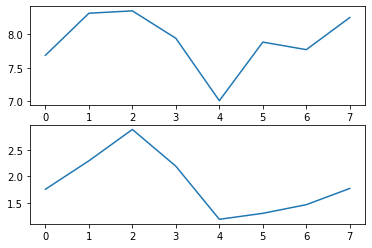

In [123]:
# 수리서비스
plt.subplot(2,1,1)
plt.plot(card_re_mct[92])
plt.subplot(2,1,2)
plt.plot(card_fo_mct[92])